<img src="https://i.ytimg.com/vi/Aeqh8DGZTf0/sddefault.jpg" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 640px; height: 255px; margin: 0px; width: 340px;" alt="COGNIFYZ TECHNOLOGIES INTERSHIP VIDEO - YouTube" jsname="kn3ccd" aria-hidden="false">

##### **Project Type**    - EDA
##### **Industry**    - Cognifyz Technologies
##### **Contribution**    - Individual
##### **Member Name -** SHIVA SAI RAM

## LEVEL -1 

### Task-1: Data Exploration and Preprocessing

Importing the required  packages

In [1]:
#importing the required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns

reading the data set

In [2]:
# reding the dataset
file_name = 'Dataset.csv'
df = pd.read_csv(file_name, encoding = "utf-8")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Quickchecks   
Explore the dataset and identify the number of rows and columns. 

In [3]:
print("rows and columns are : ",df.shape)

rows and columns are :  (9551, 21)


In [4]:
# rows 9551
# columns 21

Check for missing values in each column and handle them accordingly. 

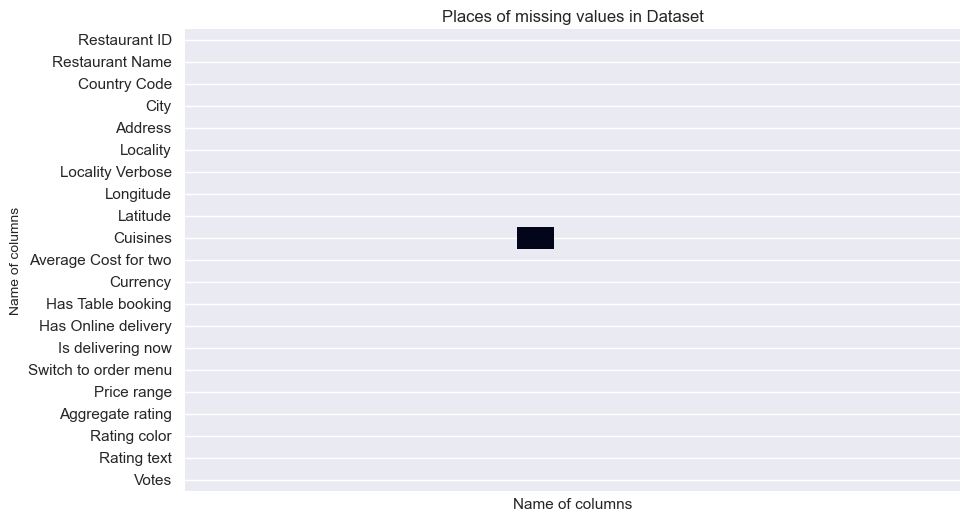

In [5]:
plt.figure(figsize = (10,6))


sns.heatmap(df.isnull().corr(),
            xticklabels=False,
            cbar=False,
            annot = False
            )

# Set labels
plt.xlabel('Name of columns', fontsize=11)
plt.ylabel('Name of columns', fontsize=10)
plt.title('Places of missing values in Dataset', fontsize=12)

# To show
plt.show()

In [6]:
# null_count counting the null values of each column
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# 'percentage of null values in each column :',null_count
null_count=df.isna().sum() * 100 / df.shape[0]
print(null_count)
null_count = np.array(null_count)
# the colmn names
columns = df.columns 

Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating color            0.000000
Rating text             0.000000
Votes                   0.000000
dtype: float64


In [8]:
# viewing the column which has the null values and the percentage of null values per 100
dict_null ={}
for val in null_count:
    if val > 0:
        dict_null[columns[np.argmax(null_count)]] = val
print(dict_null)

{'Cuisines': 0.09423097057899696}


In [9]:
# [(features,df[features].isna().sum()) for features in df.columns if df[features].isnull().sum()>0]

In [10]:
# the percentage of the missing values is very less 0.09% 
# so, removing of the missing values would be mostly preferable

#droping the null values as the percentage of the mull value count is very less
df = df.dropna()

In [11]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Now the missing rows are eliminated

In [12]:
# Now again checking the rows and columns of the dataset
'(rows , columns) :',df.shape

('(rows , columns) :', (9542, 21))

In [13]:
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

Analyze the distribution of the target variable ("Aggregate rating")

In [14]:
# Data Distribution of the target variable ("Aggregate rating")
target_counts = df['Aggregate rating'].value_counts()
print("Distribution of target variable:")
# print(target_counts)
print('Numner of unique values in Aggregate rating is ',len(target_counts))
pd.DataFrame(target_counts)

Distribution of target variable:
Numner of unique values in Aggregate rating is  33


,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,495
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


### Level -1
#### Task -1

**Understandings**

- The dataset consists of 9551 rows and  21 columns

- Indentified 9 rows of null values in the column 'Cuisines' as the count of null values is very less so the rows were dropped

- The target variable Aggregate rating 33 and there are imbalanced as the '0.0' Aggregate rating consists of the most of majority and minority class imbalance

## Level-1
### Task -2

#### Task: Descriptive Analysis 

- Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns. 
- Explore the distribution of categorical variables like "Country Code, " "City, " and "Cuisines. "Aggregate rating"
- Identify the top cuisines and cities with the highest number of restaurants.

In [15]:
# numeric column names
num_cols = df.select_dtypes(exclude = 'object')
print(num_cols.columns)

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


##### Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns. 

In [16]:
# calculating the mean of th enumeric columns
mean  = num_cols.mean()
print('The mean ofthe numeric columns : \n',mean)

The mean ofthe numeric columns : 
 Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64


In [17]:
# calculating the mean of th enumeric columns
median  = num_cols.median()
print('The median ofthe numeric columns : \n',median)

The median ofthe numeric columns : 
 Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [18]:
# calculating the mean of th enumeric columns
std_num_cols  = num_cols.std()
print('The standard deviation ofthe numeric columns : \n',std_num_cols)

The standard deviation ofthe numeric columns : 
 Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64


In [19]:
# Statistical method
# mean,median,mode
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

Explore the distribution of categorical variables like "Country Code, " "City, " and "Cuisines. "


In [20]:
cat_cols = df.select_dtypes(include = 'object')
print(cat_cols.columns)

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


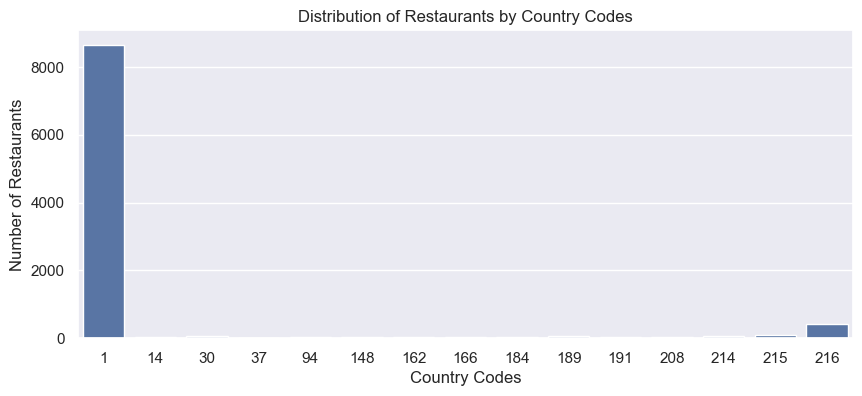

In [21]:
# the distribution of number of restaurents by country codes

plt.figure(figsize = (10,4))
sns.countplot(x = df['Country Code'])
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')
plt.show()

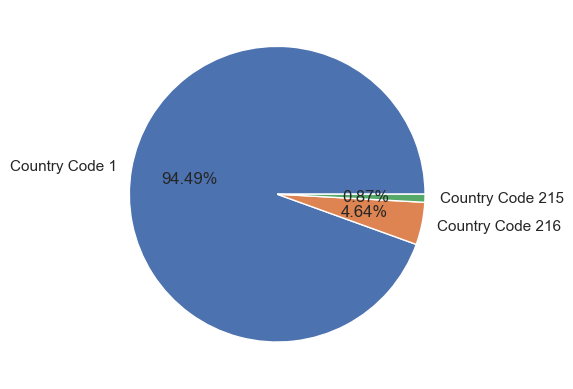

In [22]:
# the distribution of number of restaurents by country codes  taking top 3

country_val=df['Country Code'].value_counts().values
country_code = list(df['Country Code'].value_counts().keys())
country_code = [f"Country Code {i}" for i in country_code]
plt.pie(country_val[:3],labels=country_code[:3],autopct='%1.2f%%')
plt.show()

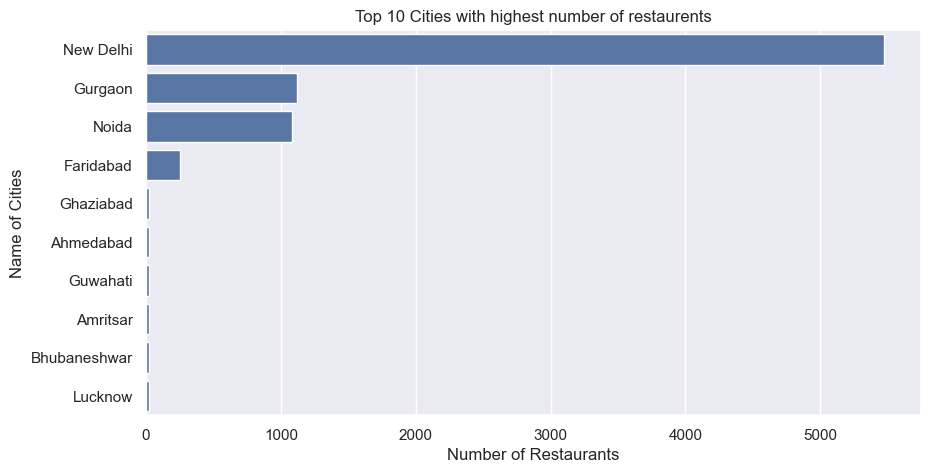

In [23]:
plt.figure(figsize=(10, 5))

# Create the figure object
# There are many cities names present in the data, so taking only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with highest number of restaurents')

# Display Chart
plt.show()

Identify the top cuisines and cities with the highest number of restaurants.

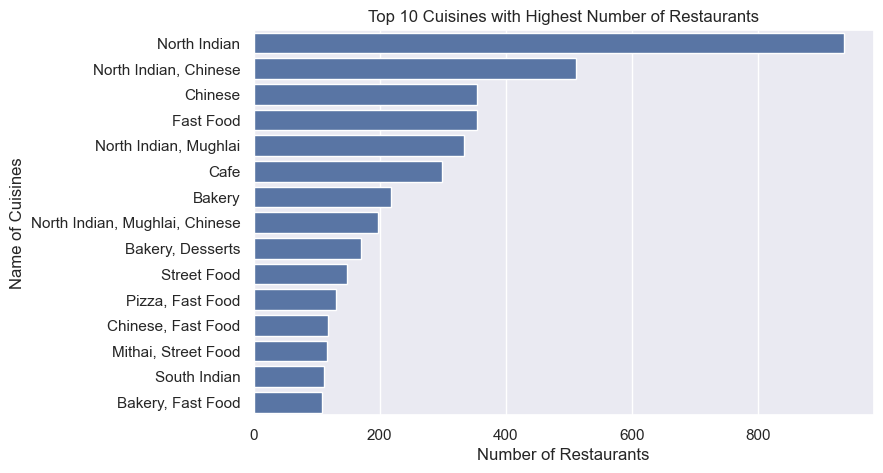

In [24]:
# Count Plot Visualization Code for Cuisines
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cuisine names present in the data, so i select only the top 15 cuisines
sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:15].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')

# Display Chart
plt.show()

Explore the distribution of target variables "Aggregate rating"

In [25]:
ratings=df.groupby(['Aggregate rating','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating text,Rating Count
0,0.0,Not rated,2148
1,1.8,Poor,1
2,1.9,Poor,2
3,2.0,Poor,7
4,2.1,Poor,15
5,2.2,Poor,27
6,2.3,Poor,47
7,2.4,Poor,87
8,2.5,Average,110
9,2.6,Average,191


In [26]:
# ratings['Rating text'].values.tolist()

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

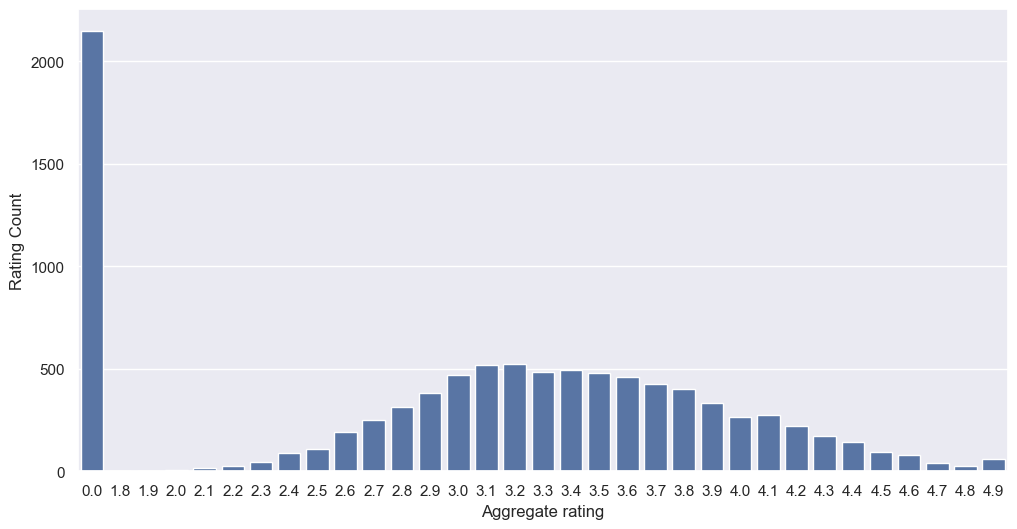

In [27]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

frequency of aggregate rating with respect to rating text

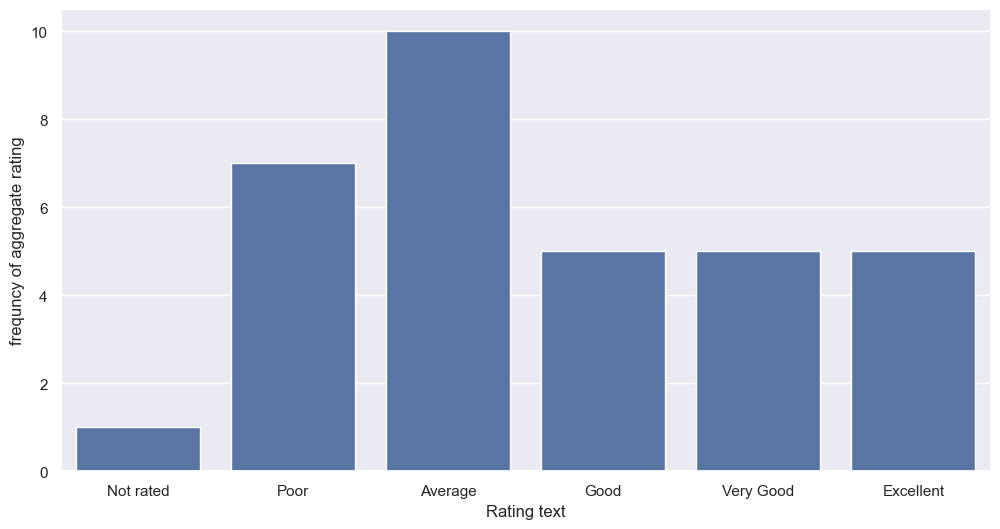

In [28]:
c = sns.countplot(x="Rating text",data=ratings)
c.set_ylabel('frequncy of aggregate rating')
plt.show()

In [29]:
rating_text_totals = ratings.groupby('Rating text')['Rating Count'].sum()
rating_text_totals.to_dict()
# type(rating_text_totals)
# rating_text_totals=pd.DataFrame(rating_text_totals)
# rating_text_totals
# pd.DataFrame(zip(rating_text_totals.keys().tolist(),rating_text_totals.values().tolist()))

{'Average': 3734,
 'Excellent': 300,
 'Good': 2096,
 'Not rated': 2148,
 'Poor': 186,
 'Very Good': 1078}

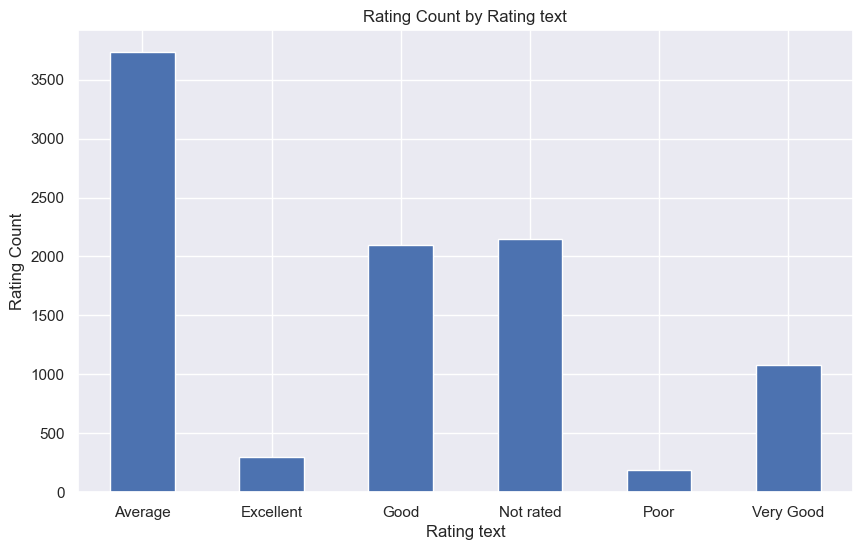

In [30]:
plt.figure(figsize=(10, 6))
rating_text_totals.plot(kind='bar', rot=0)

# Set the title and axis labels
plt.title('Rating Count by Rating text')
plt.xlabel('Rating text')
plt.ylabel('Rating Count')

plt.show()

# plt.rcParams['figure.figsize'] = (12, 6)
# sns.barplot(x="Rating text",y="Rating Count",data=rating_text_totals)

##### distribution of country code withrespect to currency

In [31]:
df[['Country Code','Currency']].groupby(['Country Code','Currency']).size().reset_index()

,Country Code,Currency,0
0,1,Indian Rupees(Rs.),8652
1,14,Dollar($),24
2,30,Brazilian Real(R$),60
3,37,Dollar($),4
4,94,Indonesian Rupiah(IDR),21
5,148,NewZealand($),40
6,162,Botswana Pula(P),22
7,166,Qatari Rial(QR),20
8,184,Dollar($),20
9,189,Rand(R),60


### Level-1
##### Task -2 

**Understandings**

- calculated the mean, median, mode values for the numerical columns 'Restaurant ID', 'Longitude', 'Latitude', 'Price range',
- Country code 1 and 216 are with highest number of restaurants.
- New Delhi, Gurgaon and Noida **cities** are in top with highest number of restaurants.
- North Indian and Chinese **cuisine** are in top with highest number of restaurants.
- The **average** rating is high with 3734 followed by **not rated** and **good** with 2nd and 3rd

### Level-1
#### Task-3
##### Task: Geospatial Analysis

- Visualize the locations of restaurants on a map using latitude and longitude information. 
- Analyze the distribution of restaurants across different cities or countries. 
- Determine if there is any correlation between the restaurant's location and its rating.


installing necessary packages

In [32]:
# ! pip install shapely
# ! pip install geopandas

Visualize the locations of restaurants on a map using latitude and longitude information. 

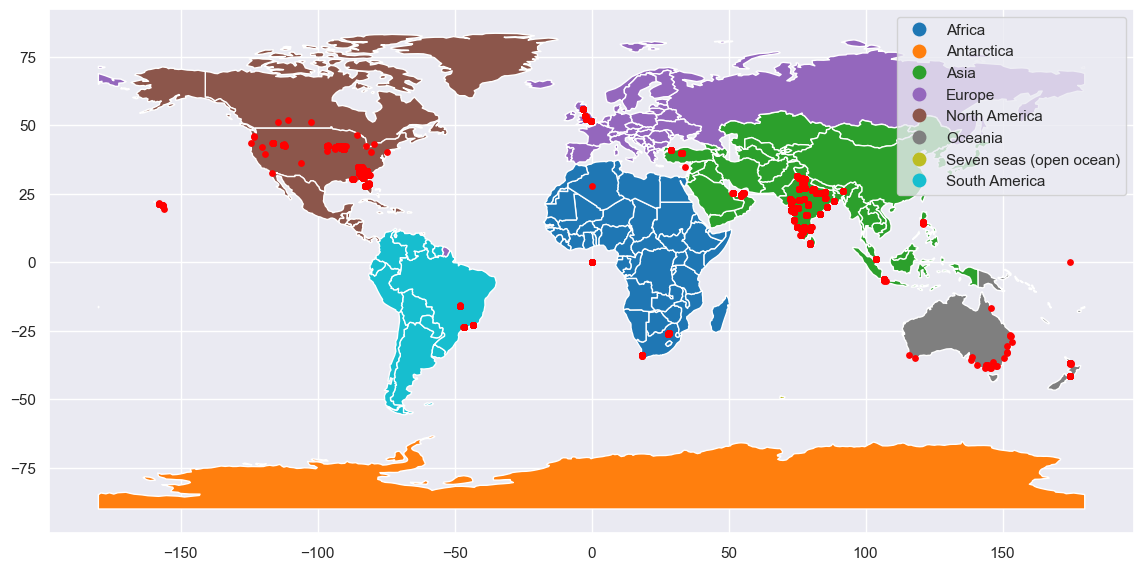

In [33]:
#importing necessary packages
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is displayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

**The country code 1 is INDIA**

**The country code 216 is North America**

**The country code 215 is Oceania**

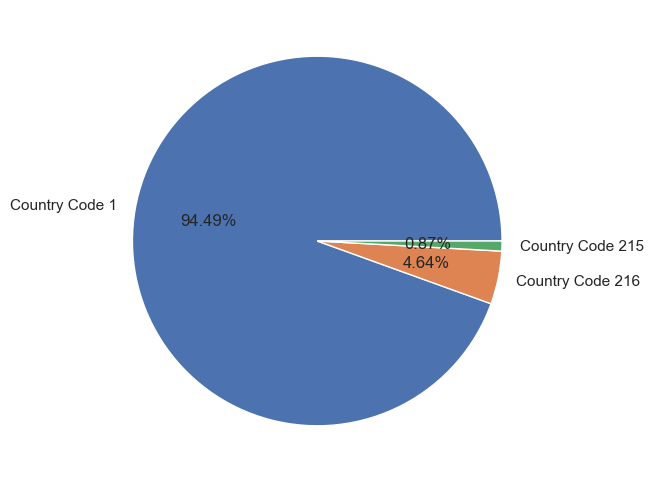

In [34]:
country_val=df['Country Code'].value_counts().values
country_code = list(df['Country Code'].value_counts().keys())
country_code = [f"Country Code {i}" for i in country_code]
plt.pie(country_val[:3],labels=country_code[:3],autopct='%1.2f%%')
plt.show()

Determine if there is any correlation between the restaurant's location and its rating.

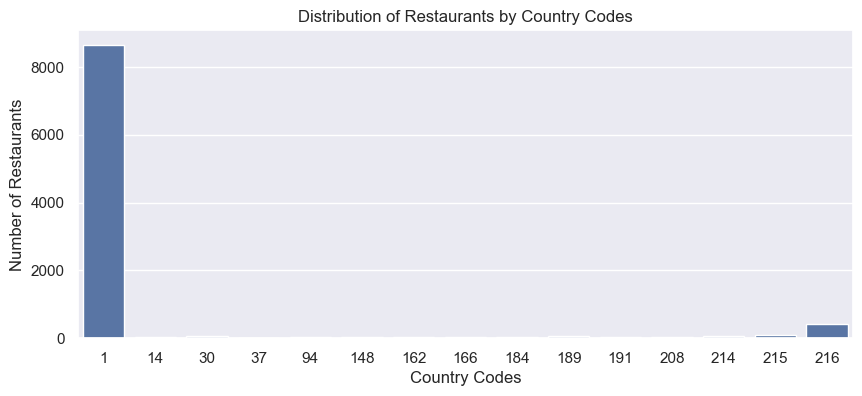

In [35]:
plt.figure(figsize = (10,4))
sns.countplot(x = df['Country Code'])
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')
plt.show()

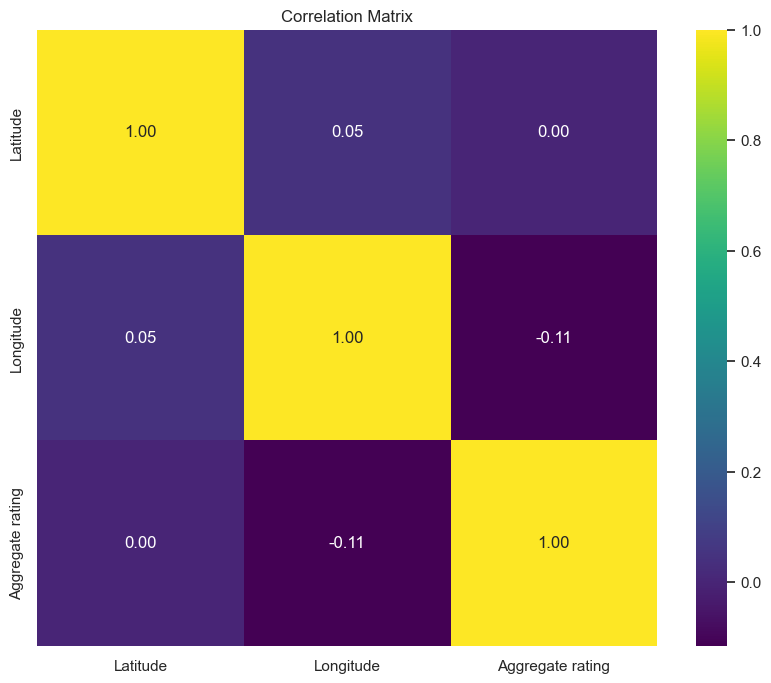

,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.045415,0.000197
Longitude,0.045415,1.000000,-0.114733
Aggregate rating,0.000197,-0.114733,1.000000


In [36]:
# Checking correlation between the restaurant's location and its rating
# Set plot size

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
pd.DataFrame(correlation_matrix)

Analyze the distribution of restaurants across different cities or countries. 

In [37]:
df[df['Has Online delivery'] =="Yes"]['Country Code'].value_counts()

Country Code
1      2423
214      28
Name: count, dtype: int64

In [38]:
df[['Has Online delivery','Country Code']].groupby(['Has Online delivery','Country Code']).size().reset_index()

,Has Online delivery,Country Code,0
0,No,1,6229
1,No,14,24
2,No,30,60
3,No,37,4
4,No,94,21
5,No,148,40
6,No,162,22
7,No,166,20
8,No,184,20
9,No,189,60


In [39]:
# (city_values[:5],city_index[:5])

In [40]:
# df.City.value_counts().index

In [41]:
# df.City.value_counts()[:5]

In [42]:
city_values= df.City.value_counts().values
city_index = df.City.value_counts().index
# city_values,city_index

The pie chart of top 5 cities which are vaving more number of restaurent


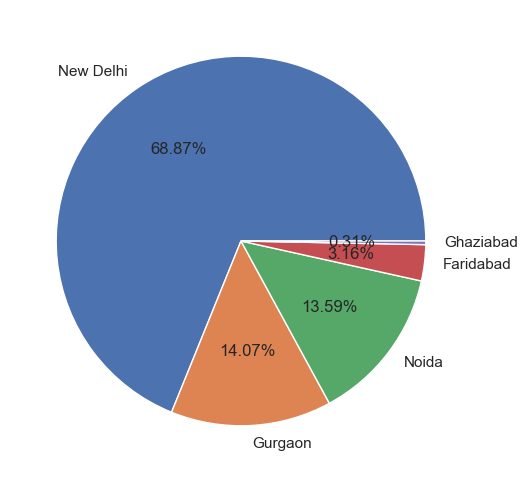

In [43]:
val_1,val2, s = plt.pie(city_values[:5],labels=city_index[:5],autopct='%1.2f%%')
print('The pie chart of top 5 cities which are vaving more number of restaurent')

### Level-1
#### Task - 3 

Understandings

- From the visualization of the maps the restaurents were more in numbered in **INDIA** country followed by **NORTH AMERICA** and **OCEANA**
- New Delhi citi has the highest number of restaurants, followed by Gurgaon, Noida, and Faridabad.
- The longitude and rating are negatively correlated while the latitude and rating are not rellated

In [44]:
# df.columns

### LEVEL-2
#### Task -1
##### Table Booking and Online Delivery
- Determine the percentage of restaurants that offer table booking and online delivery. 
- Compare the average ratings of restaurants with table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges

In [45]:
# restaurents with Has Table booking count

table_booking_count=df['Has Table booking'].value_counts()
pd.DataFrame(table_booking_count)

,count
Has Table booking,
No,8384
Yes,1158


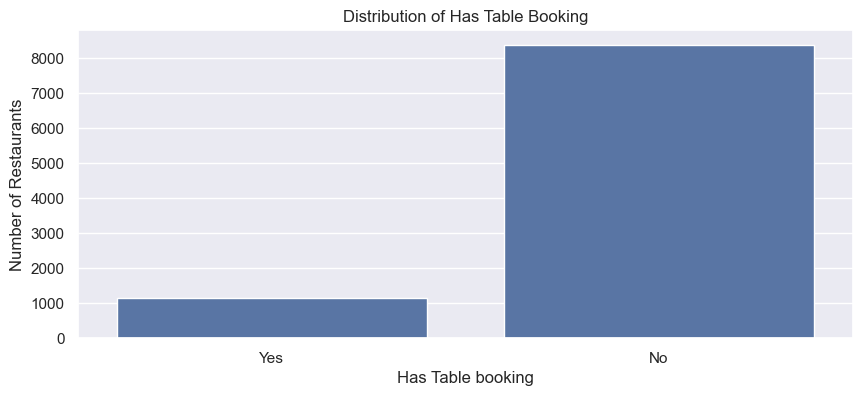

In [46]:
plt.figure(figsize = (10,4))
sns.countplot(x = df['Has Table booking'])
plt.xlabel('Has Table booking')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Has Table Booking')
plt.show()

In [47]:
total_restaurants = len(df)

table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
print(f"\nPercentage of restaurants offering Table Booking: {table_booking_percentage:.2f}% \n")

table_booking_percentage = (df['Has Table booking'] == 'No').sum() / total_restaurants * 100
print(f"Percentage of restaurants Not offering Table Booking: {table_booking_percentage:.2f}% \n")


Percentage of restaurants offering Table Booking: 12.14% 

Percentage of restaurants Not offering Table Booking: 87.86% 



In [48]:
# restaurents with Has Online delivery

online_delivery_count=df['Has Online delivery'].value_counts()
pd.DataFrame(online_delivery_count)

,count
Has Online delivery,
No,7091
Yes,2451


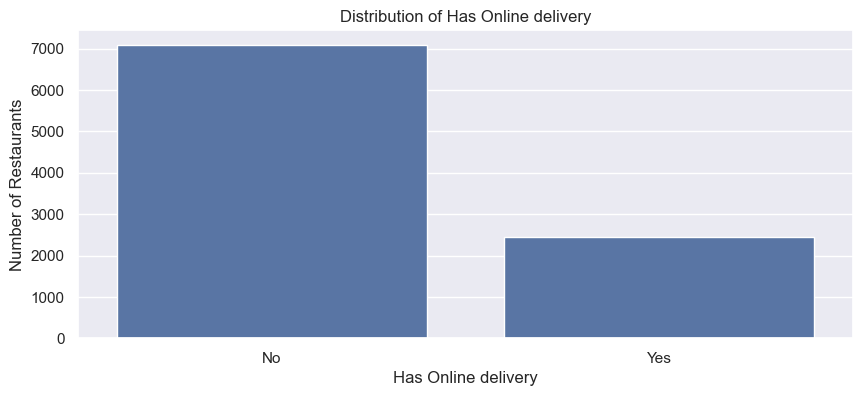

In [49]:
plt.figure(figsize = (10,4))
sns.countplot(x = df['Has Online delivery'])
plt.xlabel('Has Online delivery')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Has Online delivery')
plt.show()

In [50]:
total_restaurants = len(df)

online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100
print(f"\nPercentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}% \n")

online_delivery_percentage = (df['Has Online delivery'] == 'No').sum() / total_restaurants * 100
print(f"Percentage of restaurants Not offering Online Delivery: {online_delivery_percentage:.2f}% \n")


Percentage of restaurants offering Online Delivery: 25.69% 

Percentage of restaurants Not offering Online Delivery: 74.31% 



In [51]:
# Compare average ratings of restaurants with and without table booking

avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

#  results

print(f"\nAverage rating with Table Booking: {avg_rating_with_table:.2f} \n")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f} \n")


Average rating with Table Booking: 3.44 

Average rating without Table Booking: 2.56 



In [52]:
# Availability of online delivery among restaurants with different price ranges
# Select price ranges

price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()

print("Online Delivery Availability by Price Range:")
# print(online_delivery_by_price_range)
pd.DataFrame(online_delivery_by_price_range)

Online Delivery Availability by Price Range:


Has Online delivery,No,Yes
Average Cost for two,,
High,0.719149,0.280851
Low,0.858277,0.141723
Medium,0.566209,0.433791


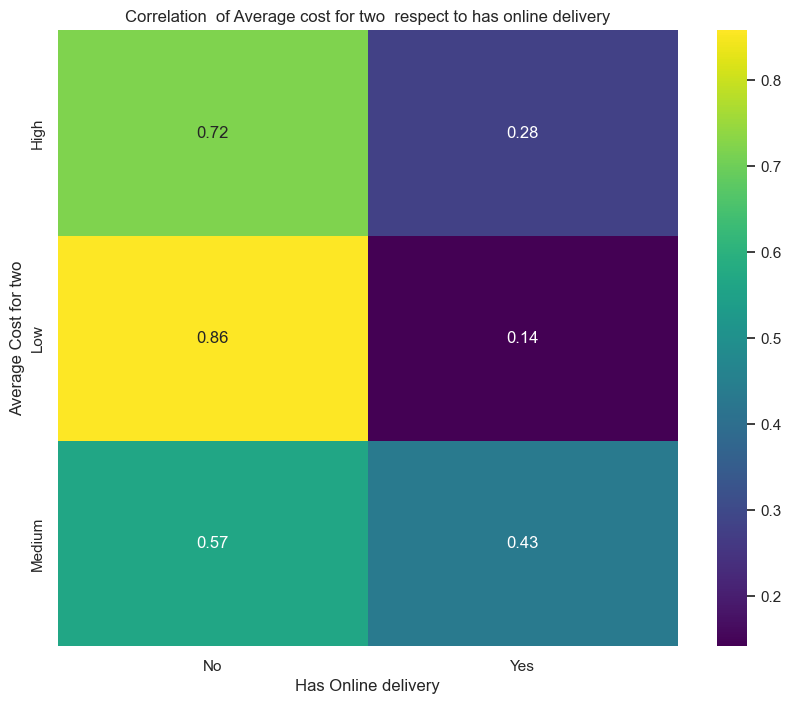

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(online_delivery_by_price_range, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation  of Average cost for two  respect to has online delivery")
plt.show()

### LEVEL-2
#### Task -1 

**Understandings**

- There are 25.69% of reataurents offer the table booking and online delivery

- Average rating with Table Booking 3.44/5.00 and those without is 2.56/5.00  

- The restaurents with **has online delivery YES** and average cost for two **MEDIUM** is **GREATER**

- The restaurents with **has online delivery NO** and average cost for two **LOW** is **GREATER**



### LEVEL-2
#### Task -2
##### Task: Price Range Analysis

- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.

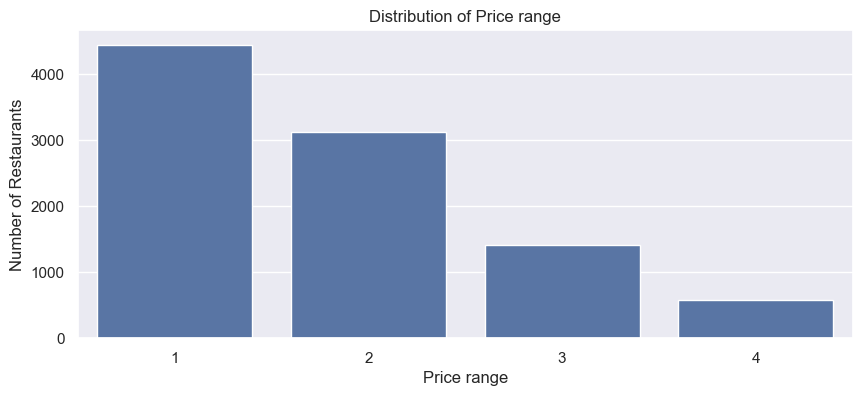

In [55]:
# price_range_mode=df['Price range'].value_counts()
# print(pd.DataFrame(price_range_mode))

plt.figure(figsize = (10,4))
sns.countplot(x = df['Price range'])
plt.xlabel('Price range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price range')
plt.show()

In [56]:
# Determining the most common price range among all the restaurants
most_common_price_range = df['Price range'].mode()[0]

# Display result
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


In [57]:
# Calculating average rating for each price range
# Group by 'Price range' and calculate the average rating
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Display result
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    1.997
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


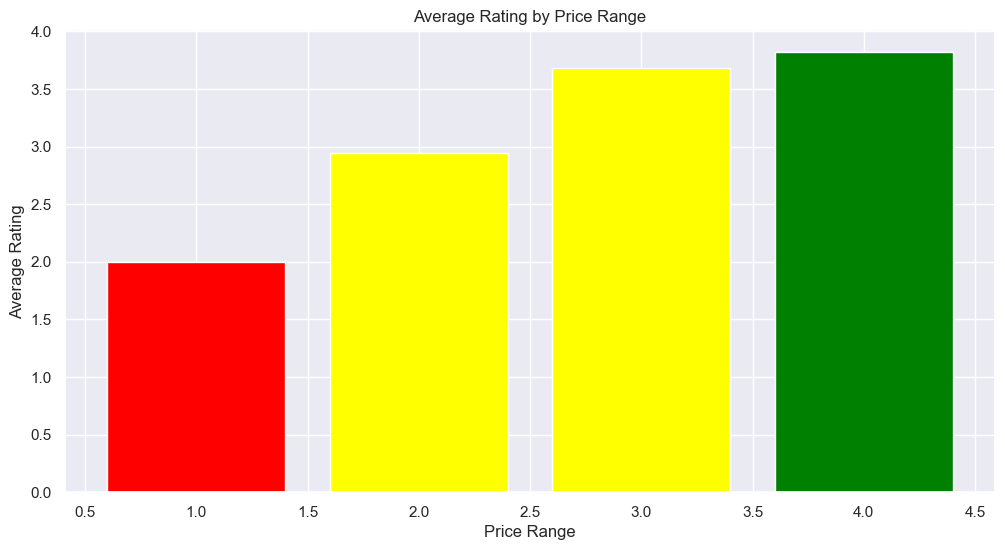

In [58]:
# Identifying the color that represents the highest average rating among different price ranges
# Find the price range with the highest average rating
highest_avg_rating_color = avg_rating_by_price_range.idxmax()
lowest_avg_rating_color = avg_rating_by_price_range.idxmin()

# Create the bar plot
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='yellow')

# Set the color of the bar corresponding to the highest average rating to a distinct color (e.g., red)
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='green')
plt.bar(lowest_avg_rating_color, avg_rating_by_price_range[lowest_avg_rating_color], color='red')

# Set labels
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')

plt.show()

### LEVEL-2
#### **Task -2**

**Understandings**

- The most common price range among all the restaurants is **1**
- The average rating for **4.0** has the **highest average rating** and the **1.0** has the **lowest average rating**.
- The color **GREEN** represents the **highest average rating** while the color **RED** represents the **Low average rating** among different price ranges.

### Level-2
### Task-3
#### Task: Feature Engineering 
- Extract additional features from the existing columns, such as the length of the restaurant name or address. 
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [59]:
# Extracting additional features from the existing columns, such as the length of the restaurant name or address
# Create a new column for the length of restaurant names
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

# Create a new column for the length of restaurant addresses
df['Address Length'] = df['Address'].apply(len)

# Display the updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [60]:
# Creating new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables
# Create new binary columns
df['Has Table Booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
df['Has Online Delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)

# Drop the original categorical columns if needed
# df = df.drop(['Has Table booking', 'Has Online delivery'], axis=1)

# Display the updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


### LEVEL-2
#### **Task -3**

**Understandings**

- Created two additional columns in the name of **Restaurant Name Length** and **Address Length**

- Modified the features like **Has Table Booking** and **Has Online Delivery** by encoding categorical variables which helps the model to understand the data as the model takes the valeus of numerical data only.


### LEVEL -3
#### Task-1
- Build a regression model to predict the aggregate rating of a restaurant based on available features.
- Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
- Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [61]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
# Import necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# df = df_balanced

In [63]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [64]:
# df.to_csv('preprocessed.csv', index=False)
df = pd.read_csv('preprocessed.csv')

In [65]:
# Select features and target variable
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [66]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")


Model: Linear Regression
Mean Squared Error: 1.6275791725010238
R-squared: 0.2892767308287971
---------------------------
Model: Decision Tree
Mean Squared Error: 0.2044938070419527
R-squared: 0.9107026499713762
---------------------------
Model: Random Forest
Mean Squared Error: 0.13079975157265292
R-squared: 0.9428830077116027
---------------------------


### LEVEL-3
#### **Task -1**

**Understandings**

- Built a **linear regression, decision trees, random forest** model to predict the aggregate rating of a restaurant based on available features.
- Splited the dataset into **training and testing sets** of **X , y**.
- the random forest gave the highest R-squared value of 0.94 and the least MSE score of 0.13
- The decision tree also gave a good R-squared score of 0.91 with the MSE score of 0.20
- The Linear regression withe the least amoung thse with the R-squared score of 0.28 and MSE score of 1.6

- Amoung these 3 models the **Random forest would be the best optimal model** for this dataset

### Level -3
### Task-2
#### Task: Customer Preference Analysis 
- Analyze the relationship between the type of cuisine and the restaurant's rating. 
- Identify the most popular cuisines among customers based on the number of votes. 
- Determine if there are any specific cuisines that tend to receive higher ratings.


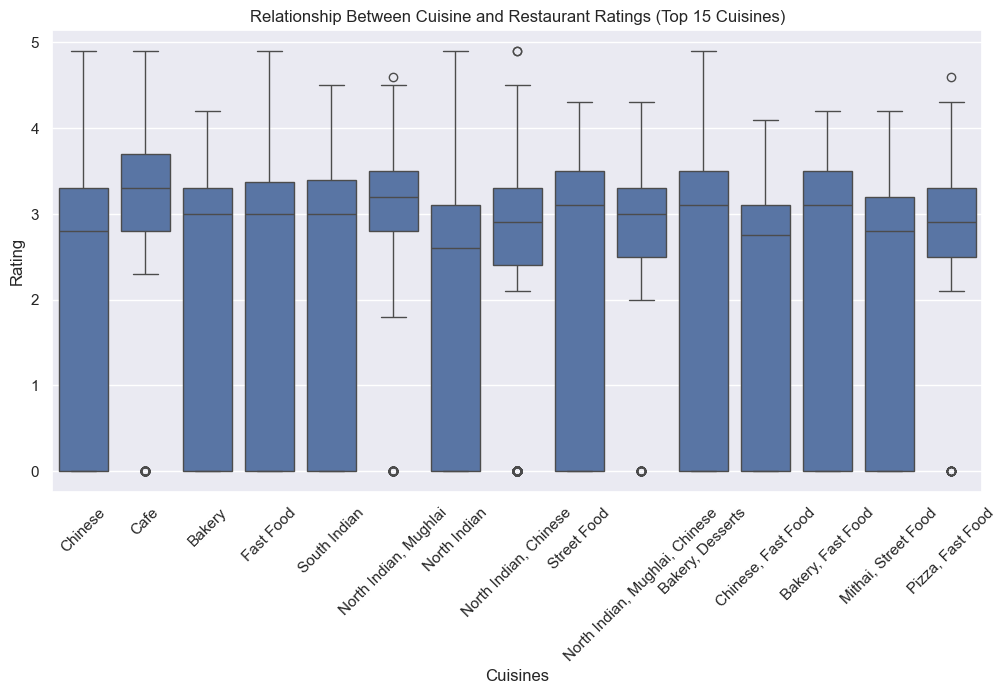

In [68]:
# Analyzing the relationship between the type of cuisine and the restaurant's rating
# There are many cuisine names present in the data, so i select only the top 15 cuisines
import matplotlib.pyplot as plt
%matplotlib inline

top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 15 cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

In [69]:
# Identifying most popular cuisines based on number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display result
print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


                            Cuisines  Aggregate rating
1062                   Italian, Deli               4.9
949                Hawaiian, Seafood               4.9
93           American, Sandwich, Tea               4.9
683              Continental, Indian               4.9
796          European, Asian, Indian               4.9
...                              ...               ...
850   Fast Food, Desserts, Beverages               0.0
844       Fast Food, Chinese, Burger               0.0
415                     Cafe, French               0.0
1687  Seafood, Mughlai, North Indian               0.0
864     Fast Food, Mughlai, Armenian               0.0

[1825 rows x 2 columns]


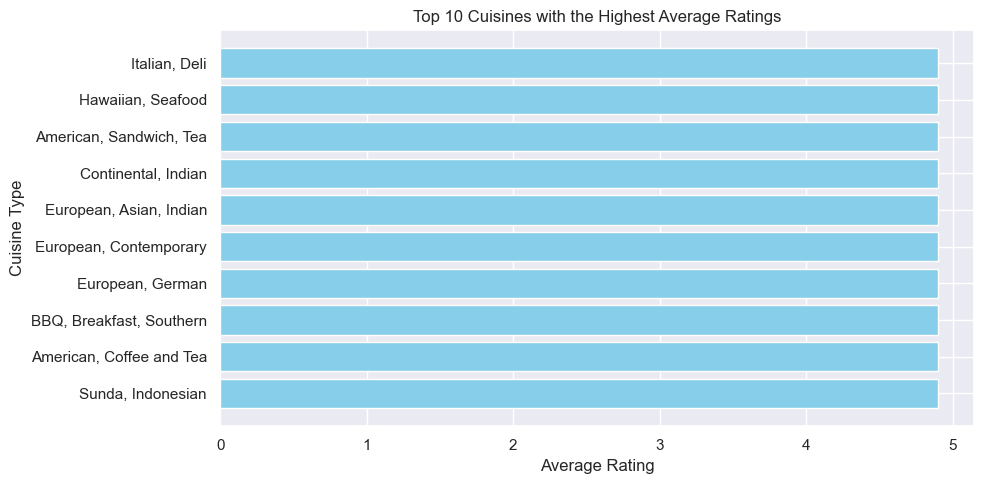

In [70]:
# Determine if there are any specific cuisines that tend to receive higher ratings
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)
print(cuisine_ratings)
# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

### LEVEL-3
#### **Task -2**

**Understandings**

- In cuisines like cafe, mughlai, north indian and fast food, restaurants may perform exceptionally well in terms of ratings.
- Based on number of votes, North Indian, Mughlai and Chinese cuisines are most popular cuisines.
- Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian are most popular cuisines.

### Level-3
### Task-3
#### Task: Data Visualization 
- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.). 
- Compare the average ratings of different cuisines or cities using appropriate visualizations. 
- Visualize the relationship between various features and the target variable to gain insights.

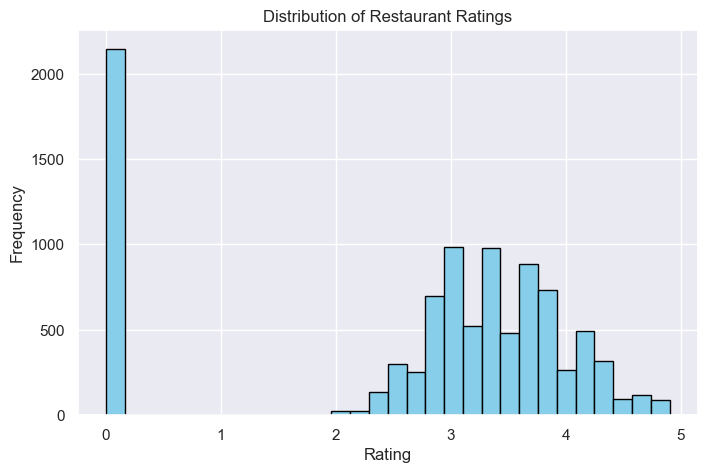

In [71]:
# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

# Display Chart
plt.show()

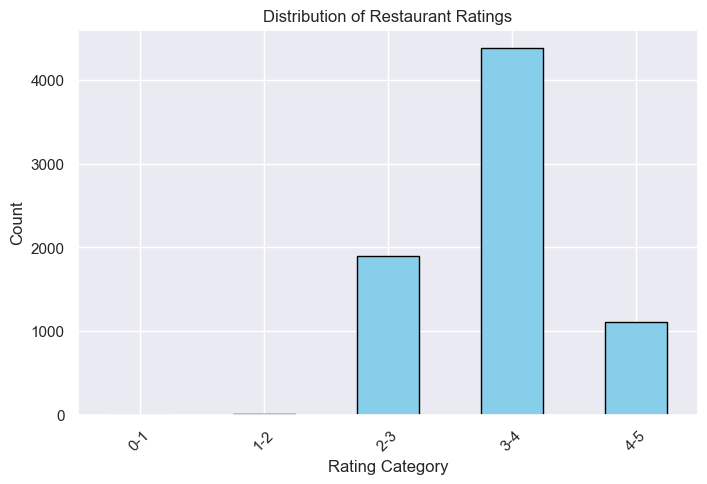

In [72]:
# Distribution of ratings by using a bar plot
# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

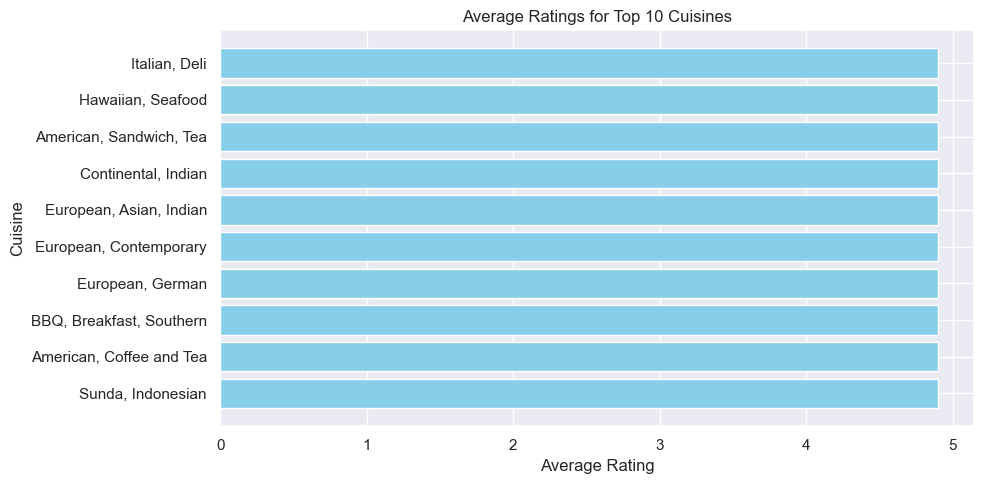

In [73]:
# Comparing average ratings of different cuisines by using a bar plot
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Add labels and title
plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

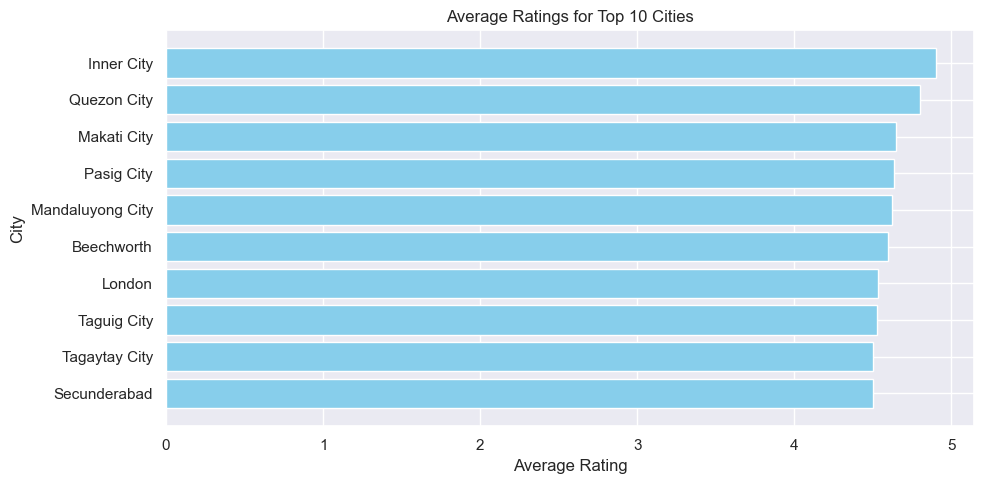

In [74]:
# Comparing average ratings of different cities by using a bar plot
# Group the data by city and calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cities with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='skyblue')

# Add labels and title
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

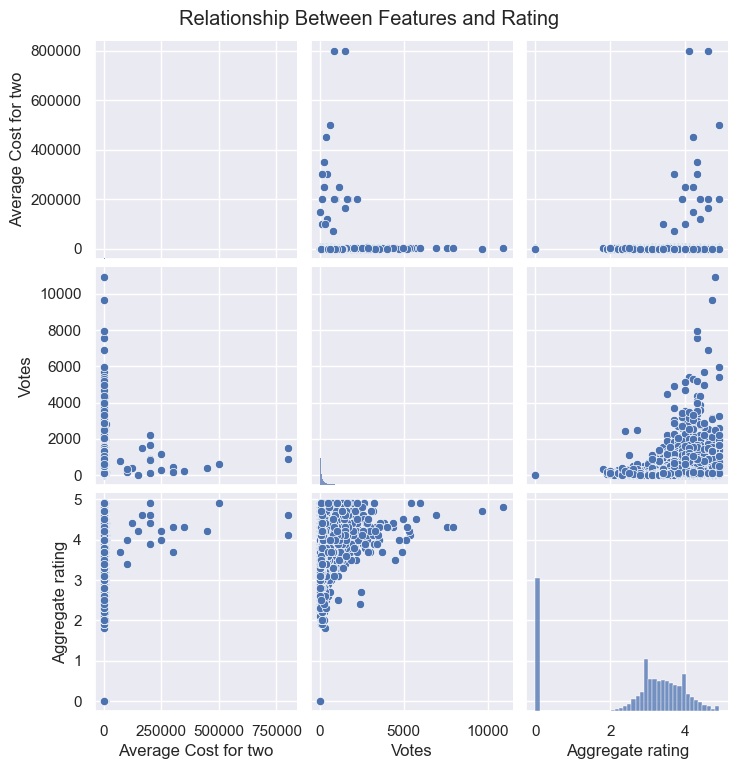

In [75]:
# Visualizing the relationship between various features and the target variable by using pair plot
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Display Chart
plt.show()

### LEVEL-3
#### **Task -3**

**Understandings**

- Distribution of restaurants ratings is negatively skewed.
- Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian cuisines are the most popular cuisines.
- The top 3 highest average rating, Inner City, Quezon City, Makati City and are most popular cities.
- Votes and restaurants ratings are positively correlated.